# Final Project Math 208
          -by Vasu Khanna 


In [2]:
#importing libraries
library(tidyverse)
library(tidyr)
library(tidytext)
library(knitr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.3  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Introduction
We will be analyzing the Women’s E-Commerce Clothing Reviews and Ratings dataset, which can be found on the Kaggle website. This dataset contains more than 23,000 online reviews of women’s clothing from various retailers. As mentioned in the Overview section on the Kaggle website, the dataset contains the following variables:
'ID', 'Age', 'Title', 'Review', 'Rating', 'Recommend', 'Liked', 'Division', 'Dept', 'Class' .

we are mainly concerned about

* Rating (out of 5)
* Department name
* Clothing ID
* Age 
* Title 
* Review
* Recommend (customer recommends this product to others: yes= 1 , no = 0 

Womens clothing firm has asked us to explore and analyse data scraped from online reviews.



In [3]:
clothes <- read_csv(("Womens_Clothing_Reviews.csv"))
clothes <- clothes[-1]
colnames(clothes) <-  c('ID', 'Age', 'Title', 'Review', 'Rating', 'Recommend', 'Liked', 'Division', 'Dept', 'Class')


Parsed with column specification:
cols(
  Review_ID = col_double(),
  Clothing_ID = col_double(),
  Age = col_double(),
  Title = col_character(),
  Review_Text = col_character(),
  Rating = col_double(),
  Recommended = col_double(),
  Positive_Feedback_Count = col_double(),
  Division_Name = col_character(),
  Department_Name = col_character(),
  Class_Name = col_character()
)


In [4]:
glimpse(clothes)
print("no of rows")
print(nrow(clothes))

#clothes1 for nlp tasks , Just for fun :D
clothes1<-clothes%>%select('ID','Age','Title','Review', 'Rating', 'Recommend', 'Dept')
clothes<-clothes%>%select('ID','Age','Rating', 'Recommend', 'Dept')
##total no of na values
clothes%>% summarize_all(list(~sum(is.na(.))))

Observations: 23,486
Variables: 10
$ ID        <dbl> 767, 1080, 1077, 1049, 847, 1080, 858, 858, 1077, 1077, 107…
$ Age       <dbl> 33, 34, 60, 50, 47, 49, 39, 39, 24, 34, 53, 39, 53, 44, 50,…
$ Title     <chr> NA, NA, "Some major design flaws", "My favorite buy!", "Fla…
$ Review    <chr> "Absolutely wonderful - silky and sexy and comfortable", "L…
$ Rating    <dbl> 4, 5, 3, 5, 5, 2, 5, 4, 5, 5, 3, 5, 5, 5, 3, 4, 3, 5, 5, 5,…
$ Recommend <dbl> 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ Liked     <dbl> 0, 4, 0, 0, 6, 4, 1, 4, 0, 0, 14, 2, 2, 0, 1, 3, 2, 0, 0, 0…
$ Division  <chr> "Initmates", "General", "General", "General Petite", "Gener…
$ Dept      <chr> "Intimate", "Dresses", "Dresses", "Bottoms", "Tops", "Dress…
$ Class     <chr> "Intimates", "Dresses", "Dresses", "Pants", "Blouses", "Dre…
[1] "no of rows"
[1] 23486


ID,Age,Rating,Recommend,Dept
0,0,0,0,14


we make 2 dataframes, one of them has reviews and title (extra) on which we try to do some natural language processing, whereas the other clothes is the DataFrame we were asked to work with. We remove the na values before proceeding with Tasks.

### Removing all not available values

In [5]:
clothes<-clothes%>%drop_na()
clothes1<-clothes1%>%drop_na()
print(nrow(clothes))
## we can see that rows of new df decreases by removing NA values

[1] 23472


## Task 1:  Basic data Analysis 
Just doing a basic analysis to see the distribuition.

Seeing what Department looks like, by looking at unique values.


In [9]:
unique(clothes["Dept"])


Dept
Intimate
Dresses
Bottoms
Tops
Jackets
Trend


Just having a glance at data for better understanding.

In [10]:
str(clothes)
head(clothes)


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	23472 obs. of  5 variables:
 $ ID       : num  767 1080 1077 1049 847 ...
 $ Age      : num  33 34 60 50 47 49 39 39 24 34 ...
 $ Rating   : num  4 5 3 5 5 2 5 4 5 5 ...
 $ Recommend: num  1 1 0 1 1 0 1 1 1 1 ...
 $ Dept     : chr  "Intimate" "Dresses" "Dresses" "Bottoms" ...


ID,Age,Rating,Recommend,Dept
767,33,4,1,Intimate
1080,34,5,1,Dresses
1077,60,3,0,Dresses
1049,50,5,1,Bottoms
847,47,5,1,Tops
1080,49,2,0,Dresses


### Rating distribuition

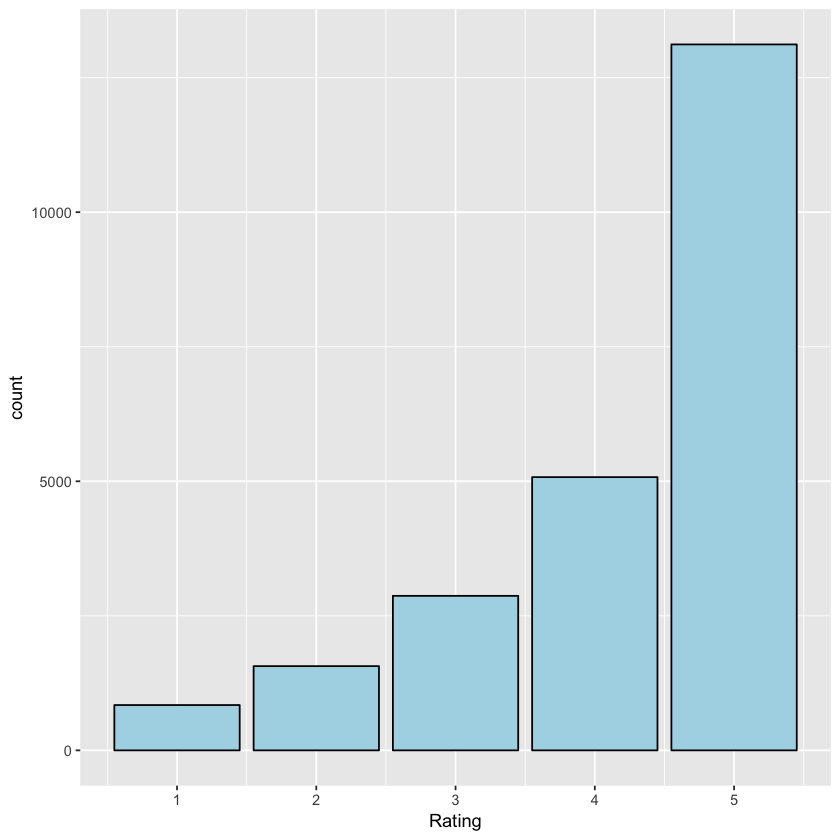

In [337]:
p <-ggplot(clothes, aes(Rating))
p +geom_bar(color = "black", fill = "light blue")
#bar plot of rating dist

In [338]:
summary(clothes$Rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   4.196   5.000   5.000 

In [339]:
Rating_dist <- clothes %>% 
  group_by(Rating) %>% 
  summarise(
    n = n()
  )
Rating_dist%>%mutate(proportion=n/sum(n)  )



Rating,n,proportion
1,842,0.03587253
2,1565,0.06667519
3,2871,0.12231595
4,5077,0.21630027
5,13117,0.55883606


Rating is a way customer can tell how much they liked the product, 1 being the least and 5 being the maximum about 55%. It can be clearly seen that maximum people give a rating of 5 followed by 4,3,2 and 1 . This can mean that when people are actually happy with the product they want to rate the product  online and let others know the product is good. High Rating given to a product would definitely make it more reliable and would increase the products sale.



### Recommend distribuition

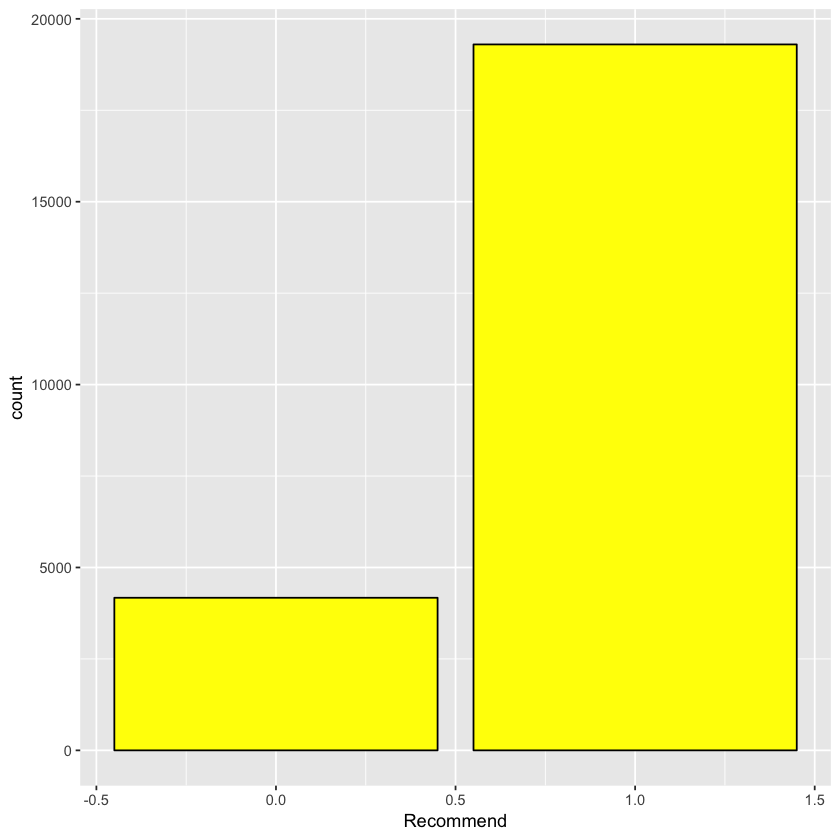

In [340]:
p <-ggplot(clothes, aes(Recommend))
p +geom_bar(color = "black", fill = "yellow")
#bar plot of recommend dist

In [341]:
Recommend_dist <- clothes %>% 
  group_by(Recommend) %>% 
  summarise( n = n())
Recommend_dist%>%mutate(proportion=n/sum(n))


Recommend,n,proportion
0,4172,0.1777437
1,19300,0.8222563


The online womens Ecommerce firm should be pleased to know that approximately 82% of people recommend the products of its firms which is a very high number. The numbers could be a bit different as seen in the correlation section 

### Age distribuition

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


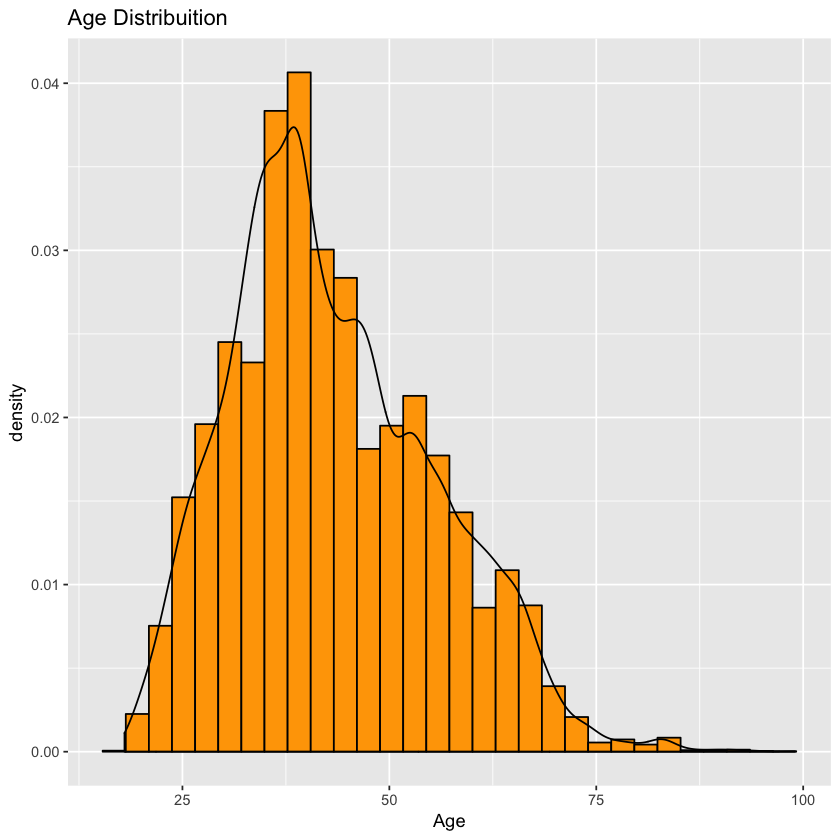

In [23]:
p <-ggplot(clothes, aes(x=Age)) 
p +geom_histogram(aes(y=..density..),color = "black", fill = "orange")+geom_density() + ggtitle("Age Distribuition")

In [24]:
ages <- clothes %>% select(ID, Age, Rating) %>%
mutate(Age_group = ifelse(Age<=25, '25 and under',ifelse(Age >= 26&Age <= 35, '26-35', ifelse(Age >= 36&Age <= 45, '36-45', ifelse(Age >= 46&Age <= 64, '46-64','65+' ))))) 
#ages
summary(ages$Age)
head(ages%>%group_by(Age_group)%>%  summarise( n = n() )%>%mutate(proportion=n/sum(n)) )%>%kable(.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.0    34.0    41.0    43.2    52.0    99.0 



|Age_group    |    n| proportion|
|:------------|----:|----------:|
|25 and under | 1221|  0.0520194|
|26-35        | 5751|  0.2450153|
|36-45        | 7386|  0.3146728|
|46-64        | 7728|  0.3292434|
|65+          | 1386|  0.0590491|

We divide the age of people into groups of 25 and under, 26-35, 36-45, 46-64 and 65+ . On some analysis we find that Minimum age of people buying online is 18 whereas Max is 99. Median and mean ages are 41 and 43.2 respectively. We find that 46-64 and 36-45 are age groups audience visit ecommerce website of firm most and 2nd most time. This gives a good idea about the target audience when advertising.

It can be seen through density plot that maximum people have age approximately 35-40, as density plot is very dense around that age.

## Correlation
Correlation is a good measure to see relationship/association between 2 or more variables. We use pairwise correlation to see correlation between pairs of variables.


In [25]:
cor(clothes[, which(sapply(clothes, is.numeric))],
    use = "pairwise.complete.obs")


,ID,Age,Rating,Recommend
ID,1.00000000,0.01732159,-0.01762602,-0.01541408
Age,0.01732159,1.00000000,0.02696743,0.03071165
Rating,-0.01762602,0.02696743,1.00000000,0.79231051
Recommend,-0.01541408,0.03071165,0.79231051,1.00000000


we can clearly see Rating and recommend are correlated since their value is close to 1

### Rating and Recommend

we will see how ratings and recommendations are distribuited


In [27]:
clothes%>%select(Rating,Recommend)%>%table(.)


      Recommend
Rating     0     1
     1   826    16
     2  1471    94
     3  1682  1189
     4   168  4909
     5    25 13092

We can clearly see that usually people recommend things when they rate it 5,4 or 3 usually. It seems like a mistake to recommend it when the rating is a low of 1 and 2 and not recommend when rating is 5 or 4, but approximately distribuition seems right

It can also be seen from the correlation between two variables that Rating and Recommend are highly associated because the value in the correlation table is very close to 1.
Also it is very intuitive that People who Rate high are highly likely to recommend the product and vice versa. In the table above it can be seen that diagonals have a value of 1 because a variable is fully correlated to itself. Whereas -1 denotes not at all correlated to each other.

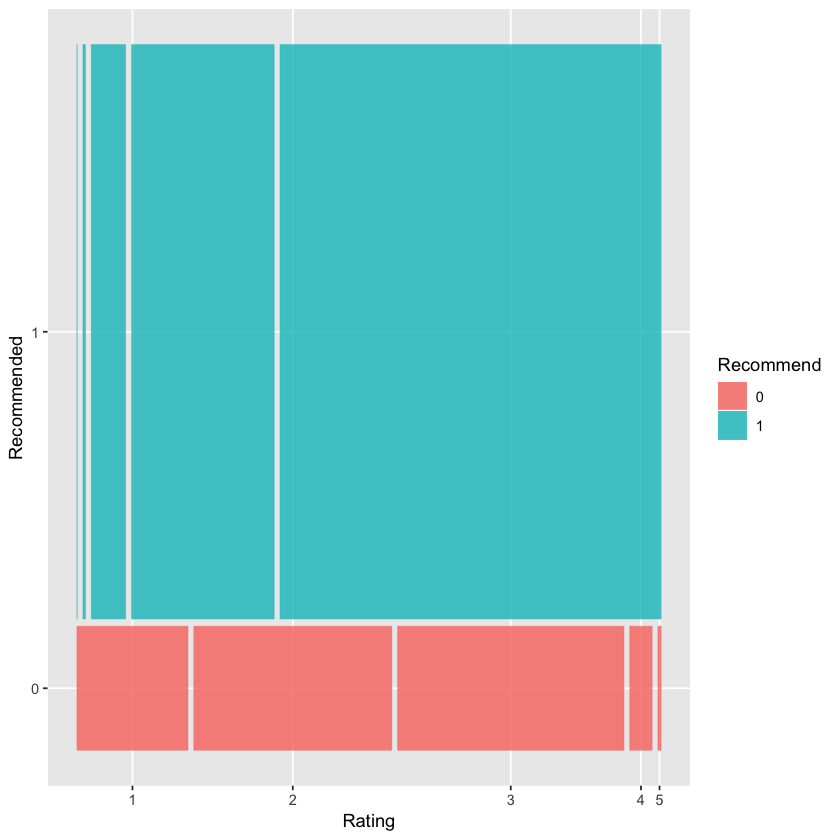

In [33]:
library(ggmosaic)
ggplot(clothes%>%mutate(Rating=factor(Rating), Recommend=factor(Recommend))) + 
geom_mosaic(aes(x=product(Rating, Recommend),fill=Recommend))+xlab("Recommended")+ylab("Rating")+coord_flip()


Further we plot a mosaic plot to visualize our findings that people who rate a rating of 5 are very likely to recommend the product whereas people who rate a rating of 1 are highly likely to not recommend the product. Thus from all the analysis we can find that Rating and Recommend have some good amount of correlation, this also makes  complete sense.

 ## Distribuition of departments

we will see the proportion of distribuition of departments in the womens ecommerce firm

In [34]:
prop.table(table(clothes$Dept))


   Bottoms    Dresses   Intimate    Jackets       Tops      Trend 
0.16185242 0.26921438 0.07391786 0.04396728 0.44597819 0.00506987 

We will use this proportion to make a plot of percentage of Reviews by department.

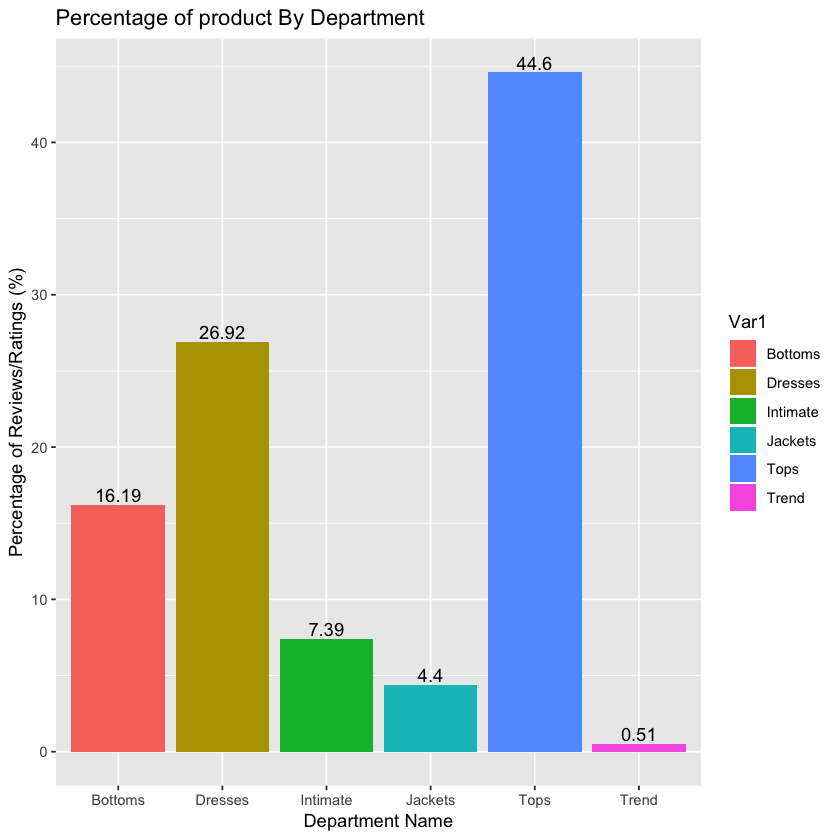

In [35]:
ggplot(data.frame(prop.table(table(clothes$Dept))), aes(x=Var1, y = Freq*100,fill=Var1)) + geom_bar(stat = 'identity')+
xlab('Department Name') + ylab('Percentage of Reviews/Ratings (%)') + 
geom_text(aes(label=round(Freq*100,2)), vjust=-0.25) + 
ggtitle('Percentage of product By Department')


We can clearly see that department of Top has the biggest market in the firms ecommerce about 45%, followed by Dresses (27%) and Bottoms (16%). Trend is a niche market of about 0.51%. 

# Task 2 : More Exploration
The firm has asked us to see if the age of the reviewers varies by department of clothing article. 

In [36]:
##making age groups as told in question 2 
ages <- clothes %>% 
mutate(Age_group = ifelse(Age<=25, '>=25',ifelse(Age >= 26&Age <= 35, '26-35', ifelse(Age >= 36&Age <= 45, '36-45', ifelse(Age >= 46&Age <= 64, '46-64','65+' ))))) 
#ages
ages <- ages %>% mutate(Age_group = factor(Age_group),Rating=factor(Rating))



In [37]:
#proportion of agegroup and ratings
ages_mod <- clothes %>% select(ID, Age, Rating) %>%
mutate(Age_group = ifelse(Age<=25, '>=25',ifelse(Age >= 26&Age <= 35, '26-35', ifelse(Age >= 36&Age <= 45, '36-45', ifelse(Age >= 46&Age <= 64, '46-64','65+' ))))) 
ages_mod<-ages%>%group_by(Rating,Age_group)%>%count()%>%ungroup() %>%mutate(prop=n/sum(n))%>%arrange(desc(n))
head(ages_mod)

Rating,Age_group,n,prop
5,46-64,4402,0.18754260
5,36-45,4070,0.17339809
5,26-35,3092,0.13173142
4,46-64,1670,0.07114860
4,36-45,1642,0.06995569
4,26-35,1218,0.05189162


It can be seen that people in the age group 46-64 give a rating of 5 the most, this table tells us that how much of a rating is given by a age group. The table is sorted in decending amount of number of ratings.

## **Rating behaviour with age**
### Task 2.2
Using proportion to see how people of different age groups rate.


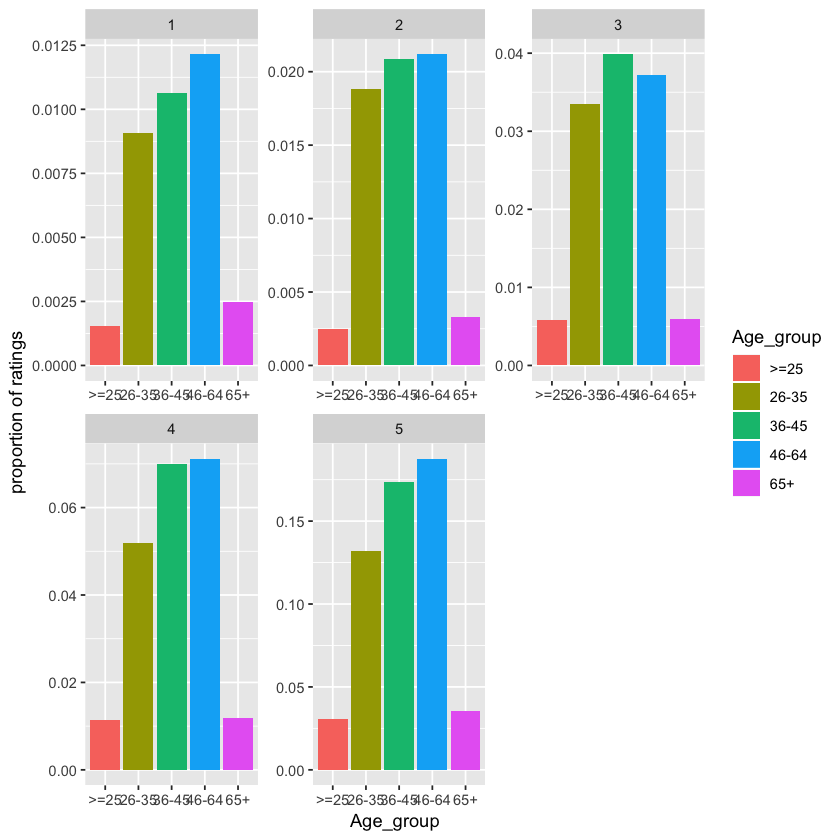

In [61]:

ages_mod%>%ggplot(aes(x=Age_group, fill =Age_group )) + 
geom_bar(stat='identity',aes(y=prop)) + facet_wrap(~Rating, scales = 'free' ) +  
ylab('proportion of ratings') 

We plot the proporions of ratings by age group using  barchart and from visualization. We find out that most ratings are given by 46-64 at almost every scale of rating, except when rating is 3. Rating of 3 is given maximum by age group 36-45,we can infer that people of age group 46-64 are most active in online ecommerce shopping . We thus conclude Task 2.2 by finding that overall Age Group 46-64 are most enthusiastic about company's products followed by age group 36-45. 

##  Interests of Age Group by department 
### Task 2.1

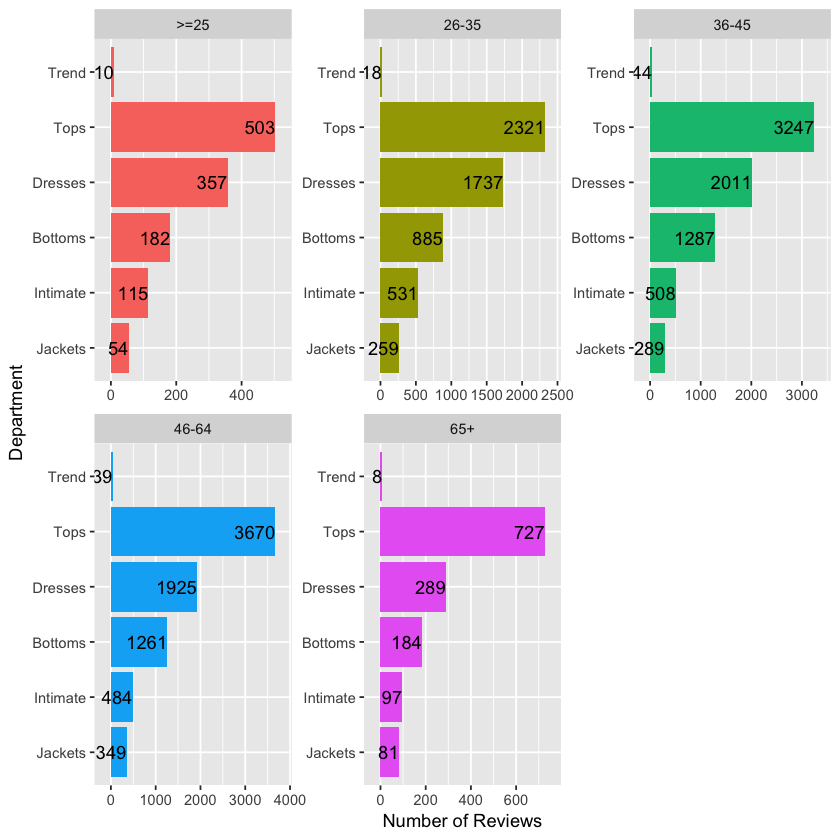

In [39]:
#facet wrap by age and look at Dept distribution in each
ages <- clothes %>% select(ID, Age, Dept) %>%
mutate(Age_group = ifelse(Age<=25, '>=25',ifelse(Age >= 26&Age <= 35, '26-35', ifelse(Age >= 36&Age <= 45, '36-45', ifelse(Age >= 46&Age <= 64, '46-64','65+' ))))) 

ages <- ages %>% mutate(Age_group = factor(Age_group), Dept = factor(Dept, levels = rev(c('Trend','Tops', 'Dresses', 'Bottoms', 'Intimate', 'Jackets'))))
ages %>% group_by(Age_group) %>% count(Dept) %>% ggplot(aes(Dept, n, fill = Age_group)) + 
geom_bar(stat='identity', show.legend = FALSE) + facet_wrap(~Age_group, scales = 'free') + xlab('Department') + 
ylab('Number of Reviews') + geom_text(aes(label = n), hjust = 1) + scale_y_continuous(expand = c(.1, 0)) + coord_flip() 


From the plot above it can be inferred that dartment of tops is highest reviewed one in every age-group, where as Trend Department is a very niche market for all ages. People in the age group 46-64 give most reviews in tops department and also generally in all departments. This gives companies an idea for who the target demographic is and for what kind of clothing types (tops, dresses) are in demand, this can help companies in their advertisement campaigns.

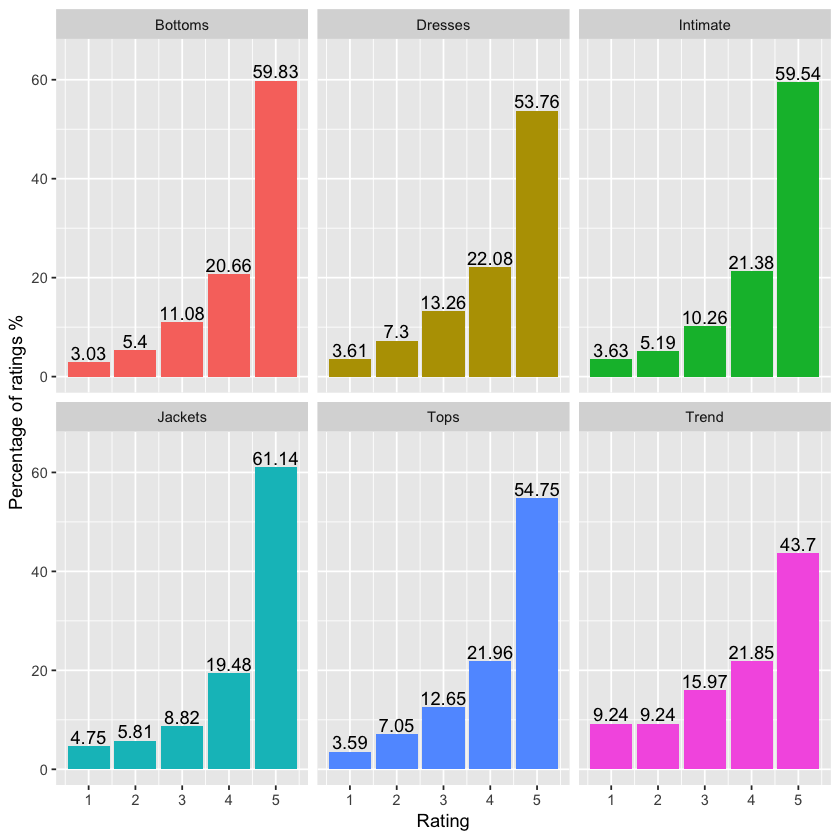

In [217]:
#ratings percentage by Department
 x<- clothes  %>% mutate(Dept = factor(Dept)) %>% group_by(Dept) %>% count(Rating) %>% mutate(prop = n/sum(n))
x%>% ggplot(aes(x=Rating, y = prop*100, fill = Dept)) + geom_bar(stat = 'identity', show.legend = FALSE) + facet_wrap(~Dept) + ylab('Percentage of ratings %') + geom_text(aes(label=round(prop*100,2)), vjust = -.2) + scale_y_continuous(limits = c(0,65))

In [361]:
clothes%>%
group_by(Age_group) %>%
summarise(Avg_Rating = mean(Rating),
Median_Rating= median(Rating))

Age_group,Avg_Rating,Median_Rating
>=25,4.291564,5
26-35,4.136150,5
36-45,4.190496,5
46-64,4.217262,5
65+,4.263348,5


We can clearly see the average and the median rating for all age groups. There is not much differece between average and median rating thus we can say that *average and median ratings do not vary much with age*.


From the plot above it is clear that jackets receive the maximum percentage of five star rating, we also know from past analysis that jackets have been reviewed and rated the least. Thus it is possible as more people rate it, its rating decreases. On the other hand dresses, Tops have least five star rating (ignoring Trend because it is niche),this could be due to the difference in fittings or difference in size/fit than expected, this is only my supposition. 



## Studying reviews using most frequent bigrams 


In [40]:
## studying reviews using most frequent bigrams 
clothesr <- clothes1 
#clothesr
notitle <- clothesr %>% select(-Title)
#notitle
wtitle <- clothesr %>%unite(Review, c(Title, Review), sep = ' ')
#wtitle
##combing them
main <- bind_rows(notitle, wtitle)
#main

Removing unnecessary stop words because they are junk and spoil our analyses.
finding the most frequently occuring bigrams, 2words (excluding stopwords).


In [41]:
# removing unnecessary stop words because they are junk and spoil our analyses
# finding the most frequently occuring bigrams, 2words (excluding stopwords)
bigramming <- function(data){
  cbigram <- data %>% unnest_tokens(bigram, Review, token = 'ngrams', n = 2)
    print(cbigram)
  cbigram_sep <- cbigram %>% separate(bigram, c('first', 'second'), sep = ' ')
        print(cbigram_sep)

  cbigram2 <- cbigram_sep %>% 
    filter(!first %in% stop_words$word, !second %in% stop_words$word, !str_detect(first,      '\\d'), !str_detect(second, '\\d')) %>%
    unite(bigram, c(first, second), sep = ' ') 
    print(cbigram2)
  return(cbigram2)
}


# A tibble: 2,506,606 x 6
      ID   Age Rating Recommend Dept     bigram         
   <dbl> <dbl>  <dbl>     <dbl> <chr>    <chr>          
 1     1    24      2         0 Intimate i love         
 2     1    24      2         0 Intimate love this      
 3     1    24      2         0 Intimate this tank      
 4     1    24      2         0 Intimate tank it        
 5     1    24      2         0 Intimate it is          
 6     1    24      2         0 Intimate is so          
 7     1    24      2         0 Intimate so comfortable 
 8     1    24      2         0 Intimate comfortable but
 9     1    24      2         0 Intimate but it         
10     1    24      2         0 Intimate it does        
# … with 2,506,596 more rows
# A tibble: 2,506,606 x 7
      ID   Age Rating Recommend Dept     first       second     
   <dbl> <dbl>  <dbl>     <dbl> <chr>    <chr>       <chr>      
 1     1    24      2         0 Intimate i           love       
 2     1    24      2         0 Intimate

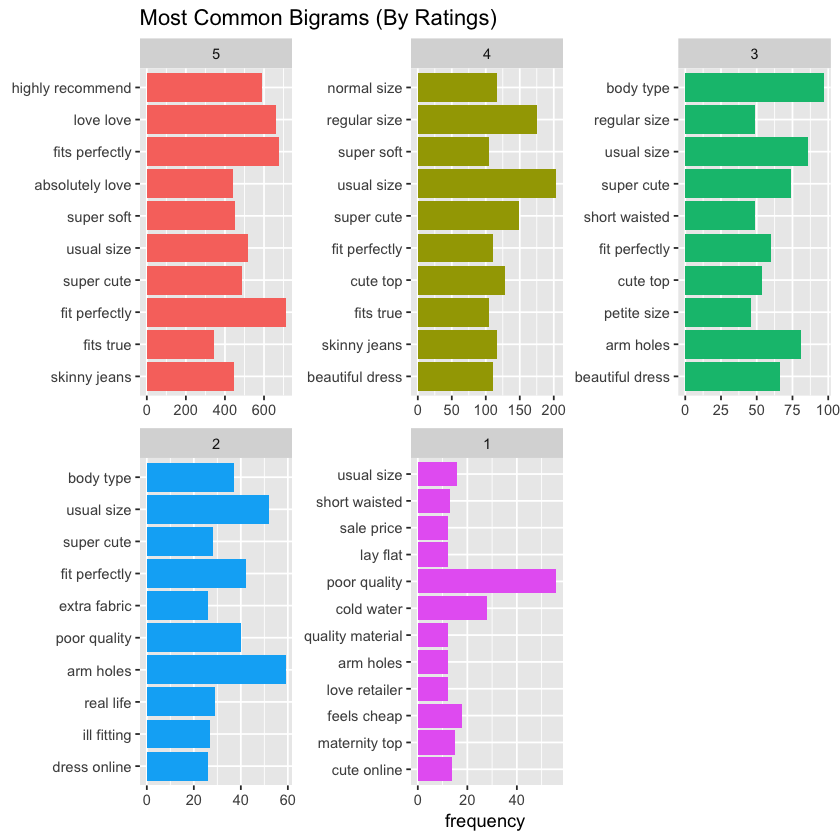

In [42]:
top_bigrams <- bigramming(main) %>% mutate(Rating = factor(Rating, levels <- c(5:1))) %>% mutate(bigram = factor(bigram, levels = rev(unique(bigram)))) %>% group_by(Rating) %>% count(bigram, sort=TRUE) %>% top_n(10, n) %>% ungroup() 

top_bigrams  %>% ggplot(aes(bigram, n, fill = Rating)) + geom_col(show.legend = FALSE) + facet_wrap(~Rating, ncol = 3, scales = 'free') + labs(x=NULL, y = 'frequency') + ggtitle('Most Common Bigrams (By Ratings)') + coord_flip()

It is seen that fit/size and quality are the top criterias for rating. "Arm holes" can also be a concern for customers, because it can be frequenlty seen in ones with bad ratings.

## Task 3
The firm has asked us to identify the best performing products, according to product ID, based on the
following measures.

### Highest average ratings:
we group by product ID and department and then create a table using summarise.The table has product ID, the number of reviews for that product, the average rating, the proportion of positive recommendations, and the department.

In [62]:
prod_high_rating <- clothes %>% group_by(ID,Dept) %>% summarise(count=n(),Avg_rating = mean(Rating),tot_no_of_reviews=sum(count),
                                                                prop_positive_recommendations=sum(Recommend)/tot_no_of_reviews)%>% arrange(desc(Avg_rating))

In [63]:
head(prod_high_rating,10)

ID,Dept,count,Avg_rating,tot_no_of_reviews,prop_positive_recommendations
0,Jackets,1,5,1,1
3,Tops,1,5,1,1
4,Tops,1,5,1,1
5,Tops,1,5,1,1
6,Tops,1,5,1,1
7,Jackets,1,5,1,1
12,Tops,1,5,1,1
14,Intimate,1,5,1,1
16,Dresses,1,5,1,1
17,Dresses,1,5,1,1


### Highest proportion of recommendations

We can use the first table in the section above for this problem. We arrange the table by the proportion
of people that would recommend the product.

In [45]:
prod_high_rating_1 <- clothes %>% group_by(ID) %>% summarise(count=n(),Avg_rating = mean(Rating),tot_no_of_reviews=sum(count),
                                                                prop_positive_recommendations=sum(Recommend)/tot_no_of_reviews)%>% arrange(desc(prop_positive_recommendations))


In [46]:
head(prod_high_rating_1,10)

ID,count,Avg_rating,tot_no_of_reviews,prop_positive_recommendations
0,1,5,1,1
2,1,4,1,1
3,1,5,1,1
4,1,5,1,1
5,1,5,1,1
6,1,5,1,1
7,1,5,1,1
9,1,4,1,1
10,1,4,1,1
12,1,5,1,1


### Highest Wilson lower confidence limits
We make functions that help  us to in WLCL function

In [57]:
a <- function(count){((1.96)^2)/count}
b <-  function(prop_positive_recommendations,count){(((prop_positive_recommendations)*(1-prop_positive_recommendations)))/count}
c_fun <- function(count,a){a/(2*count)}
WCL <- function(prop_positive_recommendations,a,b,c){(prop_positive_recommendations+a - 1.96*sqrt(b+c))/(1+2*a)}                  

In [58]:
a<-a(prod_high_rating$count)
b<-b(prod_high_rating$prop_positive_recommendations,prod_high_rating$count)
c<-c_fun(prod_high_rating$count,a)


In [59]:
WLCL<-WCL(prod_high_rating$prop_positive_recommendations,a,b,c)

In [60]:
prod_high_rating<-prod_high_rating%>%ungroup()%>% mutate(WLCL=WCL(prod_high_rating$prop_positive_recommendations,a,b,c)) %>% arrange(desc(WLCL))
head(prod_high_rating,10)

ID,Dept,count,Avg_rating,tot_no_of_reviews,prop_positive_recommendations,WLCL
834,Tops,150,4.540000,150,0.9333333,0.8705198
1025,Bottoms,125,4.464000,125,0.9360000,0.8654415
1008,Bottoms,186,4.462366,186,0.9139785,0.8563950
984,Jackets,175,4.462857,175,0.9142857,0.8544383
872,Tops,545,4.383486,545,0.8770642,0.8441965
1033,Bottoms,220,4.427273,220,0.8954545,0.8412617
1022,Bottoms,205,4.443902,205,0.8878049,0.8302374
839,Tops,48,4.562500,48,0.9583333,0.8261391
1123,Jackets,30,4.700000,30,1.0000000,0.8259696
850,Tops,338,4.307692,338,0.8698225,0.8256566


*WLCL is the best measure of product performance*. When ordering products by average rating and
proportion of recommendations, the top 10 performing items all have 1 review, and low
ID numbers. If we dont use WLCL we get an average rating of 5 but with only 1 review, this is not reliable for customers when they are purchasing products online. Thus by using WLCL, our top ten
list, each item has a unique WLCL, and thus our list of top 10 items is actually the top 10
best performing items by this metric.